# Section 1: Dataset

### Introduction

Baseball is my favorite sport, and has been for my entire life; I played baseball for twelve years, visited nine different MLB stadiums, and even wrote my college essays about baseball. I've always been fascinated by baseball stats and analytics (I'd love to work in baseball analytics someday), so what better opportunity to explore that passion than this project? In this project, I'll be using Baseball Reference's 2024 standard batting stats dataset to analyze trends and answer questions about baseball.

First, let's load in the dataset:

In [44]:
import pandas as pd
df = pd.read_csv("battingstats.csv")
df

,Rk,Player,Age,Team,Lg,WAR,G,PA,AB,R,...,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards,Player-additional
0,1,Jarren Duran*,27,BOS,AL,8.7,160,735,671,111,...,134.0,330,6,6,1,3,1,*87,AS,duranja01
1,2,Shohei Ohtani*,29,LAD,NL,9.2,159,731,636,134,...,190.0,411,7,6,0,5,10,*D,AS,ohtansh01
2,3,Gunnar Henderson*,23,BAL,AL,9.1,159,719,630,118,...,157.0,333,2,7,0,4,1,*6/D,AS,hendegu01
3,4,Marcus Semien,33,TEX,AL,4.1,159,718,650,101,...,100.0,254,9,3,0,1,2,*4,AS,semiema01
4,5,Juan Soto*,25,NYY,AL,7.9,157,713,576,128,...,179.0,328,10,4,0,4,2,*9/7DH,AS,sotoju01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,737,Justin Wilson*,36,CIN,NL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,1,NaN,wilsoju10
891,738,Josh Winckowski,26,BOS,AL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,1,NaN,winckjo01
892,739,Kirby Yates*,37,TEX,AL,0.0,3,0,0,0,...,NaN,0,0,0,0,0,0,1,AS,yateski01
893,740,Alex Young*,30,CIN,NL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,/1,NaN,youngal01


### Initial Data Adjustments

We now have the 2024 batting stats of every single MLB player who entered the lineup at any point during the season. Before we do anything with this data, there's a few issues with this dataset that I'd like to fix first:

- I want to primarily look at the stats of ***position players***, but this dataset also includes any ***pitchers*** that may have entered the lineup as well. Since pitchers are generally not good at hitting (as that's not their primary job) and many of them don't have plate appearances anyways, I'll remove them from the dataset. This can be done by getting rid of the rows that contain only a "1", "/1", or "1/H" in the "Pos" column.
- ***Players with very few plate appearances*** may end up skewing our data, since many of our stats are rate-based and their small sample sizes could result in extremely high or low rates. To combat this, I'll get rid of all players with less than 50 plate appearances.
- ***Players who played for multiple teams*** (i.e. got traded or released midseason) have a row for each team they played on as well as a cumulative row; for my purposes, I'll get rid of the cumulative row and keep the individual team rows by getting rid of the rows where the "Team" column is "2TM", "3TM", or "4TM".
- There's a few ***columns that aren't particularly useful***, such as "Rk", "Player-additional", and certain stats that even I'm not familiar with, so we'll drop these columns.

In [45]:
# Getting rid of pitchers:
df = df[((df["Pos"] != "1") & (df["Pos"] != "/1") & (df["Pos"] != "1/H"))]

# Getting rid of players with very few plate appearances:
df = df[df["PA"] >= 50]

# Getting rid of cumulative rows for multi-team players:
df = df[(df["Team"] != "2TM") & (df["Team"] != "3TM") & (df["Team"] != "4TM")]

# Dropping unused rows:
df = df.drop(columns=["Rk", "rOBA", "Rbat+", "GIDP", "SH", "SF", "Player-additional"])
df

,Player,Age,Team,Lg,WAR,G,PA,AB,R,H,...,BA,OBP,SLG,OPS,OPS+,TB,HBP,IBB,Pos,Awards
0,Jarren Duran*,27,BOS,AL,8.7,160,735,671,111,191,...,0.285,0.342,0.492,0.834,129.0,330,6,1,*87,AS
1,Shohei Ohtani*,29,LAD,NL,9.2,159,731,636,134,197,...,0.310,0.390,0.646,1.036,190.0,411,6,10,*D,AS
2,Gunnar Henderson*,23,BAL,AL,9.1,159,719,630,118,177,...,0.281,0.364,0.529,0.893,159.0,333,7,1,*6/D,AS
3,Marcus Semien,33,TEX,AL,4.1,159,718,650,101,154,...,0.237,0.308,0.391,0.699,100.0,254,3,2,*4,AS
4,Juan Soto*,25,NYY,AL,7.9,157,713,576,128,166,...,0.288,0.419,0.569,0.989,178.0,328,4,2,*9/7DH,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,Thomas Saggese,22,STL,NL,-0.2,18,52,49,5,10,...,0.204,0.250,0.306,0.556,55.0,15,1,0,4/65,NaN
652,Luke Williams,27,ATL,NL,0.2,34,52,46,8,9,...,0.196,0.275,0.261,0.535,51.0,12,1,0,H/45D716,NaN
653,Avisaíl García,33,MIA,NL,-0.2,18,51,50,4,12,...,0.240,0.255,0.380,0.635,70.0,19,0,0,9/H,NaN
654,Rece Hinds,23,CIN,NL,0.7,24,51,46,9,12,...,0.261,0.333,0.717,1.051,176.0,33,1,0,9/H78D,NaN


Now we have narrowed down our dataset to 564 players and the following columns of stats/information:

In [4]:
df.columns.tolist()

['Player',
 'Age',
 'Team',
 'Lg',
 'WAR',
 'G',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'BA',
 'OBP',
 'SLG',
 'OPS',
 'OPS+',
 'TB',
 'HBP',
 'IBB',
 'Pos',
 'Awards']

# Section 2: Exploratory Data Analysis

### Calculating League Averages

To get a better feel for the data as well as be able to evaluate individual players, let's calculate the ***league average slash line*** in 2024. A player's slash line is a good way to evaluate a player's performance, listed in the format BA/OBP/SLG.
- ***Batting Average (BA)***: (Hits) / (At-Bats)

Batting average is the percentage of at-bats in which a player gets a hit, and is a good way to measure a player's ability to get base hits. 
- ***On-Base Percentage (OBP)***: (Hits + Walks + Hit By Pitches) / (Plate Appearances)

On-base percentage is the percentage of plate appearances in which a player successfully reaches base. It's similar to batting average but accounts for methods of reaching base other than hits, most notably walks.
- ***Slugging Percentage (SLG)***: (1 * Singles + 2 * Doubles + 3 * Triples + 4 * Home Runs) / (At-Bats)

Slugging percentage is a measure of how much power a player has. It's calculated in the same way as batting average except more weight is placed on a hit depending on how many bases it is worth. (We can also just use total bases divided by at-bats for this calculation.)

It's important to take into account that these are ***rate stats***; since each player has a different amount of plate appearances, we'll have to re-calculate these stats based on league totals instead of simply taking the mean of each column.

In [3]:
# Calculate league totals:
hits = sum(df["H"])
at_bats = sum(df["AB"])
plate_appearances = sum(df["PA"])
walks = sum(df["BB"])
hit_by_pitches = sum(df["HBP"])
total_bases = sum(df["TB"])

league_ba = hits / at_bats
print("League average batting average: " + str(round(league_ba, 3)))
league_obp = (hits + walks + hit_by_pitches) / plate_appearances
print("League average on-base percentage: " + str(round(league_obp, 3)))
league_slg = total_bases / at_bats
print("League average slugging percentage: " + str(round(league_slg, 3)))



League average batting average: 0.244
League average on-base percentage: 0.312
League average slugging percentage: 0.402


Cool! Now we have our league average slash line of .244/.312/.402 (note that this is slightly off from the actual league average slash line due to our initial adjustments of the data). Using this, we have a baseline to compare any player to and evaluate their performance. For example, let's pick a few random players and look at their slash lines:

In [27]:
print("League Average: " + str(round(league_ba, 3)) + "/" + str(round(league_obp, 3)) + "/" + str(round(league_slg, 3)))
df.sample(n = 3)[["Player", "BA", "OBP", "SLG"]]

League Average: 0.244/0.312/0.402


,Player,BA,OBP,SLG
458,Travis Jankowski*,0.200,0.266,0.242
60,Andrés Giménez*,0.252,0.298,0.340
139,Logan O'Hoppe,0.244,0.303,0.409


By comparing these players to league average, we can see that:
- ***Travis Jankowski*** had an abysmal year at the plate; all three of his slash line numbers are well below league average.
- ***Andrés Giménez*** was a decent contact hitter this year, as his BA is above league average, but despite this we can see that he didn't take many walks (low OBP) and he didn't hit for power (low SLG).
- ***Logan O'Hoppe*** got hits at an exactly league-average rate, walked slightly less than league average, but had slightly more power than the league average.

As you can see, comparing individual players to league average is a great way to evaluate a player's skillset and compare players to each other.

# Section 3: Exploratory Data Visualization

Let's explore some interesting trends in our data!

First, let's define some more baseball stats that I'll be using:
- ***Wins Above Replacement (WAR)*** is an all-encompassing, cumulative stat that takes into account all aspects of a player's profile, including fielding, hitting, and baserunning. WAR measures how many more wins a player is worth compared to a readily available replacement-level player (such as a minor leaguer or free agent) at the same position. I'm not entirely sure how this is calculated as every website has its own formula, but since it's in the dataset already we don't have to worry about calculating it.
- ***On-Base Plus Slugging (OPS)*** is exactly what it sounds like; it adds on-base percentage and slugging percentage to create a number that is a measure of how good a player's overall hitting ability is, simultaneously taking into account contact, power, and discipline.

### What does the distribution of WAR look like?

First, let's look at a histogram of individual player WAR in 2024:

<Axes: title={'center': 'Wins Above Replacement (WAR) in 2024'}, xlabel='WAR', ylabel='Frequency'>

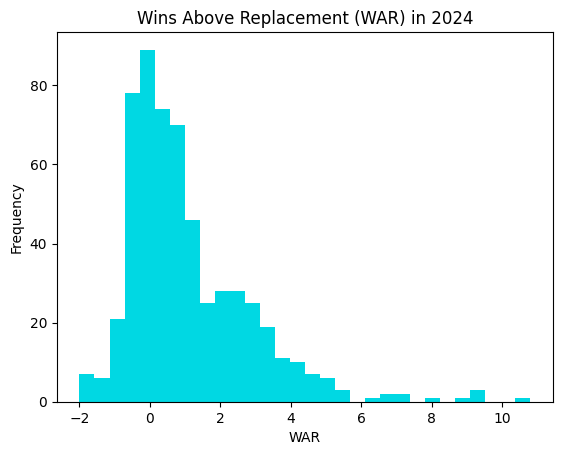

In [21]:
df["WAR"].plot.hist(bins=30, xlabel = "WAR", title = "Wins Above Replacement (WAR) in 2024", color="#00d8e3")

Baseball Reference defines the scale of WAR as:
- 8+: MVP Quality
- 5+: All-Star Quality
- 2+: Starter
- 0-2: Reserve
- <0: Replacement Level

This generally lines up with the histogram. The histogram is right skewed, showing that there are very few elite MVP-level and All-Star players, a decent amount of starters, and a surplus of reserve players. It also makes sense that there is a sharp drop-off of players as you get into negative WAR numbers, as most players that are bad enough to have negative WARs can be easily replaced by a better player.

### How does offensive production correlate with WAR?

Next, let's look at the relationship between OPS and WAR with a scatter plot:

<Axes: title={'center': 'OPS vs. WAR'}, xlabel='On-Base Plus Slugging (OPS)', ylabel='Wins Above Replacement (WAR)'>

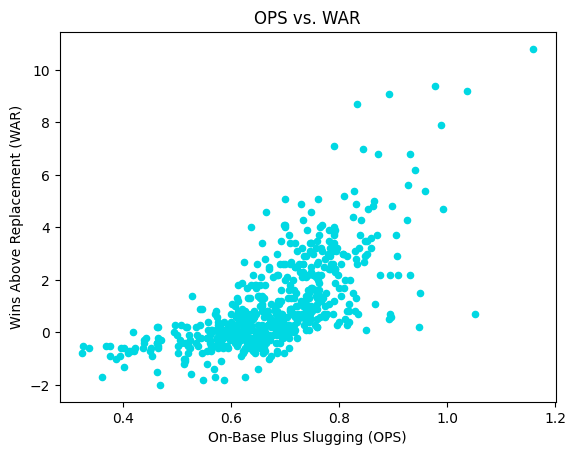

In [22]:
df.plot.scatter(x="OPS", y="WAR", xlabel="On-Base Plus Slugging (OPS)", ylabel="Wins Above Replacement (WAR)", title="OPS vs. WAR", color="#00d8e3")

As you'd expect, there's a ***positive correlation between OPS and WAR***; you can see that players that are better hitters (higher OPS) tend to be more valuable to their team! The outliers with lower WAR and higher OPS can be explained by the comparison between rate stats and cumulative stats; these are players that did very well in very small sample sizes. 

# Section 4: Planning for Part II

We now have a general idea of certain trends in the data, such as the league average slash lines and the positive correlation between offensive production and WAR. Now that we have a good feel for the data, we can dive deeper into the data to answer more complex questions! Some possible questions we could try to answer in Part II are:

- ***Can we try to project breakout players in 2025 based on rate stats?***

Predicting player performance is a real use of baseball analytics; what if we try to find the "hidden gems" of baseball by finding players that would have been really good if they had more playing time? To do this, we could take a look at existing rate stats as well as explore turning cumulative stats into rate stats, and then extrapolating these over a full season.

- ***What's the most important tool for winning: contact, power, or speed?***

Obviously a well-balanced offense is the key to a strong team, but which of these three correlates best with winning teams? To do this, we'll have to create a new DataFrame containing team statistics and records. Additionally, we'll need to find the best stats to quantify pure contact, power, and speed.

- ***Who should have been an All-Star this year that wasn't? Who was an All-Star that shouldn't have been?***

This one's pretty self-explanatory; we can find who the best offensive performers were that weren't All-Stars and the worst offensive performers who were All-Stars.

- ***Can we predict WAR based on offensive statistics? Can we use the difference between predicted WAR and actual WAR to predict a player's defensive abilities?***

Since we saw that WAR and OPS are heavily correlated, we can try to predict a player's WAR by using their offensive statistics (both rate and cumulative). Building off of this, since WAR _also_ takes defense into account, can we separate good from bad defenders using the difference between our offensive model and their actual WAR?

### Conclusion

I hope you enjoyed going through my project and maybe learned something new along the way. I really had a lot of fun working on this project and look forward to doing Part II!

# Section 5: Data Science

In part II of this project, we'll take a look at two of the questions posed in section 4, using machine learning to answer them:

- ***What's the most important tool for winning: contact, power, or speed?*** (Section 5)

- ***Can we predict WAR based on offensive statistics? Can we use the difference between predicted WAR and actual WAR to predict a player's defensive abilities?*** (Section 6)

### What's the most important tool for winning: contact, power, or speed?

A well-balanced offense is the key to winning games, but which of the three main offensive tools is the most important for winning? To do this, we'll create three different predictive models, one for contact, power, and speed, then see which one predicts wins most accurately.

First, let's create a new DataFrame with every team and the number of wins they had in 2024:

In [46]:
import pandas as pd
data = {
    "Team": ["LAD", "PHI", "NYY", "MIL", "SDP", "CLE", "BAL", "ARI", "ATL", "NYM", "HOU", "DET", "KCR", "SEA", "CHC", "STL", "MIN", "BOS", "SFG", "TBR", "TEX", "CIN", "PIT", "TOR", "WSN", "OAK", "LAA", "MIA", "COL", "CHW"],
    "Wins": [98, 95, 94, 93, 93, 92, 91, 89, 89, 89, 88, 86, 86, 85, 83, 83, 82, 81, 80, 80, 78, 77, 76, 74, 71, 69, 63, 62, 61, 41]
}
df_records = pd.DataFrame(data)

Next, we'll go back to our original DataFrame and group the data by team, and then merge that with the team DataFrame:

In [47]:
df_grouped = df.groupby("Team", as_index=False).agg("sum", numeric_only = True)

# Get rid of irrelevant/rate stats
df_grouped = df_grouped.drop(columns=['Age','G','BA','OBP','SLG','OPS','OPS+'])

# Merge dataframes
df_teams = pd.merge(df_records, df_grouped)
df_teams

,Team,Wins,WAR,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,TB,HBP,IBB
0,LAD,98,39.7,6174,5445,833,1405,290,26,232,810,134,22,598,1315,2443,64,33
1,PHI,95,29.0,6119,5492,781,1415,281,24,198,742,148,30,510,1360,2338,62,21
2,NYY,94,30.3,6147,5364,802,1333,241,14,235,776,86,25,663,1292,2307,47,26
3,MIL,93,27.0,6082,5387,772,1347,247,33,177,739,214,41,594,1424,2191,46,19
4,SDP,93,22.0,6008,5435,749,1441,257,17,185,715,118,28,454,1047,2287,56,18
5,CLE,92,21.3,5879,5271,700,1258,244,18,185,665,146,46,457,1180,2093,87,30
6,BAL,91,32.4,6021,5423,770,1363,256,33,230,745,98,23,480,1306,2375,63,14
7,ARI,89,34.5,6190,5445,875,1442,267,37,211,839,115,30,555,1248,2416,84,17
8,ATL,89,20.6,5919,5335,686,1304,269,14,212,664,62,16,480,1419,2237,54,11
9,NYM,89,24.3,6036,5394,745,1331,275,14,204,728,104,20,502,1354,2246,91,11


Before we make our models, let's identify and define stats that we can use to measure each offensive attribute:

Contact describes a player's ability to put bat on ball; thus, the best way to measure a player's pure contact skill is ***strikeout rate (K%)***, which is the percentage of at-bats in which a player strikes out. Players with low strikeout rates are better contact hitters.

- ***Strikeout Rate (K%)***: (Strikeouts) / (At-Bats)

Additionally, we will use ***singles*** and ***batting average*** as factors in our contact model.

--

One stat that excels in measuring pure power is ***isolated power (ISO)***. ISO is calculated in the same way as slugging percentage except it only weighs the extra bases of each hit, so singles are not included in the calculation; this isolates power, hence the stat's name. (Note that this can also be calculated by simply subtracting batting average from slugging percentage.)

- ***Isolated Power (ISO)***: (1 * Doubles + 2 * Triples + 3 * Home Runs) / (At-Bats)

Additionally, we will use ***home runs*** and ***slugging percentage*** as factors in our power model.

--

The most difficult tool to quantify using this dataset is speed. While stolen base percentage is a helpful statistic, I don't feel like this is the most accurate measure of speed. Faster players may take more risks and try to steal more bases, while slower players may only attempt to steal when they feel they have a guaranteed shot at stealing a base. Because of this, we might find that slower players have higher successful steal rates than faster players. Instead, I'll create my own unofficial stat in addition to stolen base percentage: ***SB/1B***. This stat I just made up measures how often a player will steal a base after getting a single, measuring the rate of attempted steals rather than the rate of successful steals.

- ***Adjusted Steal Rate (SB/1B)***: (Stolen Bases) / (Singles)

Additionally, we will use ***triples*** and ***stolen base percentage*** as factors in our speed model.

--

Let's add all of these stats to our team DataFrame:

In [48]:
df_teams["K%"] = round(df_teams["SO"] / df_teams["AB"], 3)
df_teams["BA"] = round(df_teams["H"] / df_teams["AB"], 3)
df_teams["1B"] = df_teams["H"] - df_teams["HR"] - df_teams["3B"] - df_teams["2B"]
df_teams["ISO"] = round((df_teams["2B"] + 2 * df_teams["3B"] + 3 * df_teams["HR"]) / df_teams["AB"], 3)
df_teams["SLG"] = round(df_teams["TB"] / df_teams["AB"], 3)
df_teams["SB/1B"] = round(df_teams["SB"] / (df_teams["H"] - df_teams["2B"] - df_teams["3B"] - df_teams["HR"]), 3)
df_teams["SB%"] = df_teams["SB"] / (df_teams["SB"] + df_teams["CS"])

Now let's make and train our models!

In [49]:
from sklearn.linear_model import LinearRegression

# Contact
con_model = LinearRegression()
con_model = con_model.fit(df_teams[["1B", "BA", "K%"]], df_teams["Wins"])

# Power
pwr_model = LinearRegression()
pwr_model = pwr_model.fit(df_teams[["HR", "SLG", "ISO"]], df_teams["Wins"])

# Speed
spd_model = LinearRegression()
spd_model = spd_model.fit(df_teams[["3B", "SB%", "SB/1B"]], df_teams["Wins"])

Now we use our models to predict each team's win total and then calculate error for each model's prediction:

In [50]:
df_teams["predicted_con"] = con_model.predict(df_teams[["1B", "BA", "K%"]])
df_teams["error_con"] = df_teams["Wins"] - df_teams["predicted_con"]

df_teams["predicted_pwr"] = pwr_model.predict(df_teams[["HR", "SLG", "ISO"]])
df_teams["error_pwr"] = df_teams["Wins"] - df_teams["predicted_pwr"]

df_teams["predicted_spd"] = spd_model.predict(df_teams[["3B", "SB%", "SB/1B"]])
df_teams["error_spd"] = df_teams["Wins"] - df_teams["predicted_spd"]

df_teams


,Team,Wins,WAR,PA,AB,R,H,2B,3B,HR,...,ISO,SLG,SB/1B,SB%,predicted_con,error_con,predicted_pwr,error_pwr,predicted_spd,error_spd
0,LAD,98,39.7,6174,5445,833,1405,290,26,232,...,0.191,0.449,0.156,0.858974,98.184589,-0.184589,99.011348,-1.011348,94.634324,3.365676
1,PHI,95,29.0,6119,5492,781,1415,281,24,198,...,0.168,0.426,0.162,0.831461,89.099860,5.900140,90.336173,4.663827,88.816159,6.183841
2,NYY,94,30.3,6147,5364,802,1333,241,14,235,...,0.182,0.430,0.102,0.774775,88.670080,5.329920,92.314971,1.685029,76.294348,17.705652
3,MIL,93,27.0,6082,5387,772,1347,247,33,177,...,0.157,0.407,0.240,0.839216,81.376385,11.623615,83.045217,9.954783,91.683084,1.316916
4,SDP,93,22.0,6008,5435,749,1441,257,17,185,...,0.156,0.421,0.120,0.808219,89.666846,3.333154,88.575885,4.424115,83.070048,9.929952
5,CLE,92,21.3,5879,5271,700,1258,244,18,185,...,0.158,0.397,0.180,0.760417,81.478460,10.521540,79.469213,12.530787,73.473237,18.526763
6,BAL,91,32.4,6021,5423,770,1363,256,33,230,...,0.187,0.438,0.116,0.809917,91.132742,-0.132742,94.980283,-3.980283,88.663521,2.336479
7,ARI,89,34.5,6190,5445,875,1442,267,37,211,...,0.179,0.444,0.124,0.793103,96.773547,-7.773547,97.025867,-8.025867,86.724442,2.275558
8,ATL,89,20.6,5919,5335,686,1304,269,14,212,...,0.175,0.419,0.077,0.794872,86.377262,2.622738,87.814274,1.185726,80.461508,8.538492
9,NYM,89,24.3,6036,5394,745,1331,275,14,204,...,0.170,0.416,0.124,0.838710,86.376616,2.623384,86.663372,2.336628,87.617814,1.382186


Let's see how the average absolute errors for each model compare to each other!

In [51]:
print("Average absolute error for contact model: " + str(sum(df_teams["error_con"].abs()) / len(df_teams)))
print("Average absolute error for power model: " + str(sum(df_teams["error_pwr"].abs()) / len(df_teams)))
print("Average absolute error for speed model: " + str(sum(df_teams["error_spd"].abs()) / len(df_teams)))

Average absolute error for contact model: 6.76970857457498
Average absolute error for power model: 6.283667710311463
Average absolute error for speed model: 7.238137213507602


As we can see here, the linear regression model based on power metrics was the best at predicting team wins. As a result, we have the answer to our initial question: ***Power is the most important of the three offensive tools for a winning team!***

# Section 6: Another Data Visualization

I'm going to use this section as an opportunity to answer the second of our two main questions:

### Can we predict WAR based on offensive statistics? Can we use the difference between predicted WAR and actual WAR to predict a player's defensive abilities?

To answer the first part of this question, we'll make another multiple linear regression model, this time predicting individual player WAR. We already saw in section 3 that ***OPS and WAR have a strong correlation***, so we'll use ***OPS*** as the main predictive variable for offensive production in our model. Another stat we'll factor in is ***plate appearances***, as WAR is a cumulative stat so we need some way to account for how much a player played during the season. We'll also use ***walks, hits,*** and ***home runs*** as general cumulative offensive stats as well, and also ***stolen bases*** to account for baserunning value.

In [147]:
# Training the model
war_model = LinearRegression()
ind = ["OPS", "SB", "HR", "H", "PA", "BB"]
war_model = war_model.fit(df[ind], df["WAR"])

# Adding predicted WAR to DataFrame
df["Predicted WAR"] = war_model.predict(df[ind])

# Adding error to DataFrame
df["Error"] = df["WAR"] - df["Predicted WAR"]

df

,Player,Age,Team,Lg,WAR,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,HBP,IBB,Pos,Awards,Predicted WAR,Error
0,Jarren Duran*,27,BOS,AL,8.7,160,735,671,111,191,...,0.492,0.834,129.0,330,6,1,*87,AS,5.344013,3.355987
1,Shohei Ohtani*,29,LAD,NL,9.2,159,731,636,134,197,...,0.646,1.036,190.0,411,6,10,*D,AS,10.244221,-1.044221
2,Gunnar Henderson*,23,BAL,AL,9.1,159,719,630,118,177,...,0.529,0.893,159.0,333,7,1,*6/D,AS,6.119052,2.980948
3,Marcus Semien,33,TEX,AL,4.1,159,718,650,101,154,...,0.391,0.699,100.0,254,3,2,*4,AS,2.468755,1.631245
4,Juan Soto*,25,NYY,AL,7.9,157,713,576,128,166,...,0.569,0.989,178.0,328,4,2,*9/7DH,AS,7.219750,0.680250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,Thomas Saggese,22,STL,NL,-0.2,18,52,49,5,10,...,0.306,0.556,55.0,15,1,0,4/65,NaN,-0.357711,0.157711
652,Luke Williams,27,ATL,NL,0.2,34,52,46,8,9,...,0.261,0.535,51.0,12,1,0,H/45D716,NaN,-0.290483,0.490483
653,Avisaíl García,33,MIA,NL,-0.2,18,51,50,4,12,...,0.380,0.635,70.0,19,0,0,9/H,NaN,-0.113060,-0.086940
654,Rece Hinds,23,CIN,NL,0.7,24,51,46,9,12,...,0.717,1.051,176.0,33,1,0,9/H78D,NaN,0.693900,0.006100


Time to visualize this data to help us answer both parts of our question! To do this, I'll create a scatter plot of the data, with the x-axis being our model's predicted WAR and the y-axis being the player's actual WAR. I'll also add some extra features to this plot to help visualize this data. First, I'll graph the line y=x on this plot to ***show where predicted WAR is equal to actual WAR***. This way, we can easily look at the plot and see where our model underestimated WAR (points above the line) and overestimated WAR (points below the line). Additionally, we'll finally make use of the Awards column in our dataset. The ***Gold Glove*** is an award given out to the best defensive player at each position in each league. I'll color the points representing 2024 Gold Glove winners ***gold***. Since we based our model purely off of offensive stats and WAR also takes into account defense, we want to see if our model ***underestimated WAR for good defensive players***.

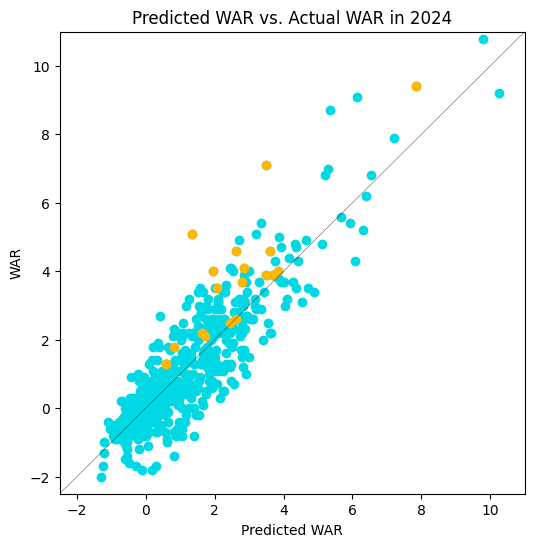

In [150]:
import matplotlib.pyplot as plt
df_gg = df[df["Awards"].str.contains("GG", na=False)]
x = [-2.5, 11]
y= [-2.5, 11]
plt.figure(figsize=(6,6))
plt.scatter(df["Predicted WAR"], df["WAR"], color = "#00d8e3")
plt.scatter(df_gg["Predicted WAR"], df_gg["WAR"], color = "#ffb700")
plt.plot(x, y, color="Black", linewidth = ".25")
plt.xlim(-2.5, 11)
plt.ylim(-2.5, 11)
plt.xlabel("Predicted WAR")
plt.ylabel("WAR")
plt.title("Predicted WAR vs. Actual WAR in 2024")
plt.show()

Some descriptive statistics about this plot and our model:

In [151]:
print("Average absolute error of model: " + str(sum(df["Error"].abs()) / len(df)))
print("Correlation between WAR and Predicted WAR: " + str(df.corr(numeric_only=True)["WAR"]["Predicted WAR"]))
print("Average error for Gold Glovers: " + str(df_gg["Error"].mean()))
df_error = df.nlargest(20, "Error")
df_both = df_error[df_error["Awards"].str.contains("GG", na=False)]
print(str(len(df_both)) + " of the top 20 players with highest prediction error were Gold Glovers")

Average absolute error of model: 0.6120937988094015
Correlation between WAR and Predicted WAR: 0.8849724762443882
Average error for Gold Glovers: 1.164472151779593
4 of the top 20 players with highest prediction error were Gold Glovers


Overall, it looks like our model is pretty good at predicting WAR! Visually, we can see that the points are generally close to the line where predicted WAR is equal to actual WAR, meaning that error is generally small. This is backed up by the ***relatively low average absolute error*** and a ***correlation coefficient of .885*** between WAR and Predicted WAR, which is close to 1 indicating a very close correlation.

As for whether or not we can use the error of our model to predict defensive performance, we have mixed results. While all of the Gold Glove recipients (colored in gold) are either above the line or right on it, only 4 of the top 20 prediction errors recieved a Gold Glove. Whether this is a shortcoming of our model or a statement on how Gold Gloves are chosen cannot be determined without looking at actual defensive metrics, which we don't have in our dataset. However, while we can't really determine the degree to which a player is a good or bad defender, it seems we can generally say that ***good defenders are above the line and bad defenders are below it***.

# Section 7: Overall Summary

Overall, this has been a very successful project! Working with ***Baseball-Reference's 2024 MLB Standard Batting*** dataset, we started by ***cleaning the data***, getting rid of unwanted players that skew the data and unnecessary columns. From there, we ***analyzed initial trends in the data*** such as the league average slash line, distribution of WAR across the league, and relationship between WAR and OPS. We then ***looked deeper into the data using machine learning models***. Using ***multiple linear regression***, we created separate models based on power, speed, and contact to predict team wins and found that, with an average absolute error of 6.28, ***power was the most important offensive attribute*** over contact and speed, with average absolute errors of 6.77 and 7.24, respectively. Finally, once again using multiple linear regression, we created a very reliable (low average absolute error of .612, strong correlation coefficient of .885 between actual and predicted WAR) model to ***predict WAR using offensive statistics***. By seeing how our model performed on Gold Glove award recipients, we came to the conclusion that ***our model can be used to separate good defenders from bad defenders*** based on if it underestimated or overestimated players' actual WAR.

I had so much fun doing this project and being in this class in general. I really hope that at least some part of this was interesting to you. Thanks!